# HMHN DS Technical Assesment - Danny Helfman

### Case Study and Background
Your team has an idea to improve patient care for those who may have heart disease.

Your
manager has asked you to create a model to predict heart disease, as a proof of concept.

With a POC model, you will begin a concrete discussion with stakeholders.


One of your colleagues previously worked on a project related to heart disease and has shared the data (dataset.csv)

Provide your data science solution to predict the presence of heart disease. Explain each step
of your work. Include any discussion you would like to add

### Data Dictionary

● id: patient identification number

● age: age in years

● sex: sex

● cp: chest pain type

● trestbps: resting blood pressure (in mm Hg on admission to the hospital)

● chol: serum cholestoral in mg/dl

● smoke: 1 = yes; 0 = no

● fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

● famhist: family history of coronary artery disease (1 = yes; 0 = no)

● restecg: resting electrocardiographic results

● ekgdt: date of exercise ECG reading

● thalach: maximum heart rate achieved

● exang: exercise induced angina (1 = yes; 0 = no)

● oldpeak: ST depression induced by exercise relative to rest

● slope: the slope of the peak exercise ST segment

● ca: number of major vessels (0-3) colored by flourosopy

● thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

● diagnosis: presence of heart disease (1 = yes; 0 = no)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# adjusting notebook settings
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

np.set_printoptions(precision=2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)
from matplotlib import style # print(plt.style.available) to find other plot styles
plt.style.use('seaborn-white')
style.use('seaborn-white')

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['figure.figsize'] = (30, 20)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14

plt.ion()
%matplotlib inline
%xmode Verbose
%config InlineBackend.figure_format = 'retina'
# %lsmagic
# %debug # https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.06-Errors-and-Debugging.ipynb

# %unload_ext google.colab.data_table
# %load_ext google.colab.data_table

Exception reporting mode: Verbose


In [ ]:
dataset_csv = "/content/drive/MyDrive/HMHN/DS Technical Assessment/dataset.csv"
dataset_df = pd.read_csv(dataset_csv)
dataset_df.head()

,id,age,sex,cp,trestbps,chol,smoke,fbs,famhist,restecg,ekgdt,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,1,47,male,typical angina,132,155,0,0,0.0,left ventricular hypertrophy,20210104,193,0,0.0,upsloping,0.0,4.0,0
1,2,41,male,non-anginal pain,130,214,0,0,0.0,left ventricular hypertrophy,20210105,168,0,2.0,flat,0.0,3.0,0
2,3,52,female,atypical angina,139,145,0,0,NaN,normal,20210105,188,0,0.1,upsloping,0.0,5.0,0
3,4,63,male,asymptomatic,126,177,0,0,1.0,left ventricular hypertrophy,20210105,121,1,1.1,downsloping,2.0,6.0,0
4,5,49,male,non-anginal pain,102,289,0,1,NaN,left ventricular hypertrophy,20210105,170,0,0.2,upsloping,1.0,5.0,0


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         877 non-null    int64  
 1   age        877 non-null    int64  
 2   sex        877 non-null    object 
 3   cp         877 non-null    object 
 4   trestbps   877 non-null    int64  
 5   chol       877 non-null    int64  
 6   smoke      877 non-null    int64  
 7   fbs        877 non-null    int64  
 8   famhist    570 non-null    float64
 9   restecg    789 non-null    object 
 10  ekgdt      877 non-null    int64  
 11  thalach    877 non-null    int64  
 12  exang      877 non-null    int64  
 13  oldpeak    877 non-null    float64
 14  slope      877 non-null    object 
 15  ca         829 non-null    float64
 16  thal       700 non-null    float64
 17  diagnosis  877 non-null    int64  
dtypes: float64(4), int64(10), object(4)
memory usage: 123.5+ KB


In [ ]:
dataset_df.describe()

,id,age,trestbps,chol,smoke,fbs,famhist,ekgdt,thalach,exang,oldpeak,ca,thal,diagnosis
count,877.00,877.00,877.00,877.00,877.0,877.00,570.00,8.77e+02,877.00,877.00,877.00,829.00,700.00,877.00
mean,439.00,53.62,130.14,243.93,0.0,0.18,0.03,2.02e+07,154.50,0.33,1.01,0.68,4.66,0.16
std,253.31,9.00,17.02,52.53,0.0,0.38,0.17,3.45e+02,22.06,0.47,0.95,0.77,1.45,0.37
min,1.00,29.00,94.00,126.00,0.0,0.00,0.00,2.02e+07,71.00,0.00,0.00,0.00,3.00,0.00
25%,220.00,47.00,118.00,208.00,0.0,0.00,0.00,2.02e+07,140.00,0.00,0.20,0.00,3.00,0.00
50%,439.00,54.00,130.00,240.00,0.0,0.00,0.00,2.02e+07,155.00,0.00,0.80,1.00,4.00,0.00
75%,658.00,60.00,141.00,276.00,0.0,0.00,0.00,2.02e+07,171.00,1.00,1.50,1.00,6.00,0.00
max,877.00,77.00,200.00,564.00,0.0,1.00,1.00,2.02e+07,202.00,1.00,6.20,3.00,7.00,1.00


In [ ]:
dataset_df.isnull().sum()

id             0
age            0
sex            0
cp             0
trestbps       0
chol           0
smoke          0
fbs            0
famhist      307
restecg       88
ekgdt          0
thalach        0
exang          0
oldpeak        0
slope          0
ca            48
thal         177
diagnosis      0
dtype: int64

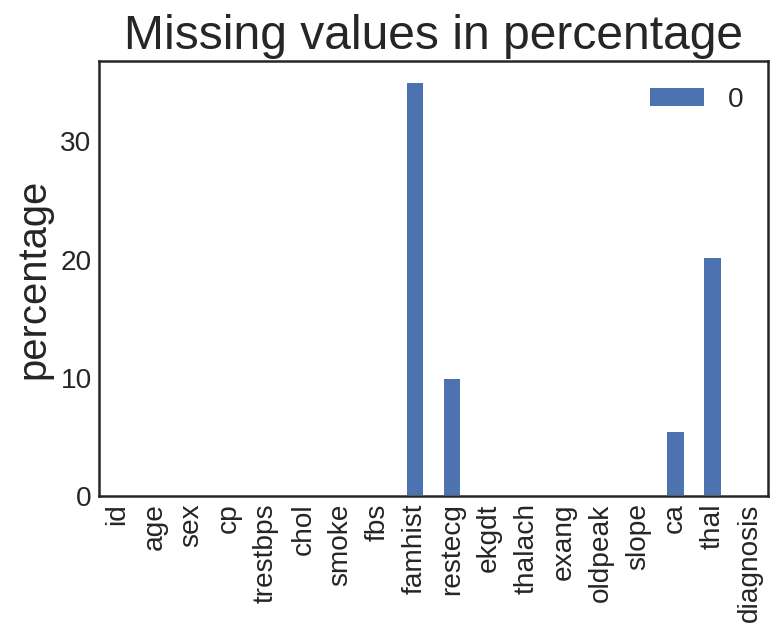

In [ ]:
miss_vals = pd.DataFrame(dataset_df.isnull().sum() / len(dataset_df) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

In [ ]:
X = dataset_df[["age", "trestbps", "chol", "smoke",	"fbs",	"ekgdt", "thalach",	"exang", "oldpeak"]]
y = dataset_df["diagnosis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((701, 9), (176, 9))

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GPC', GaussianProcessClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('QDA', QuadraticDiscriminantAnalysis()))
#models.append(('NN', MLPClassifier()))

In [ ]:
kfold = model_selection.KFold(n_splits=10)

results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.830161 (0.046024)
LDA: 0.850181 (0.035827)
KNN: 0.827344 (0.038732)
CART: 0.760282 (0.060397)
NB: 0.833018 (0.038583)
SVM: 0.830161 (0.046024)
GPC: 0.763139 (0.053349)
RF: 0.842998 (0.046246)
AB: 0.830161 (0.037740)
XGB: 0.834427 (0.058435)
GB: 0.835895 (0.054050)


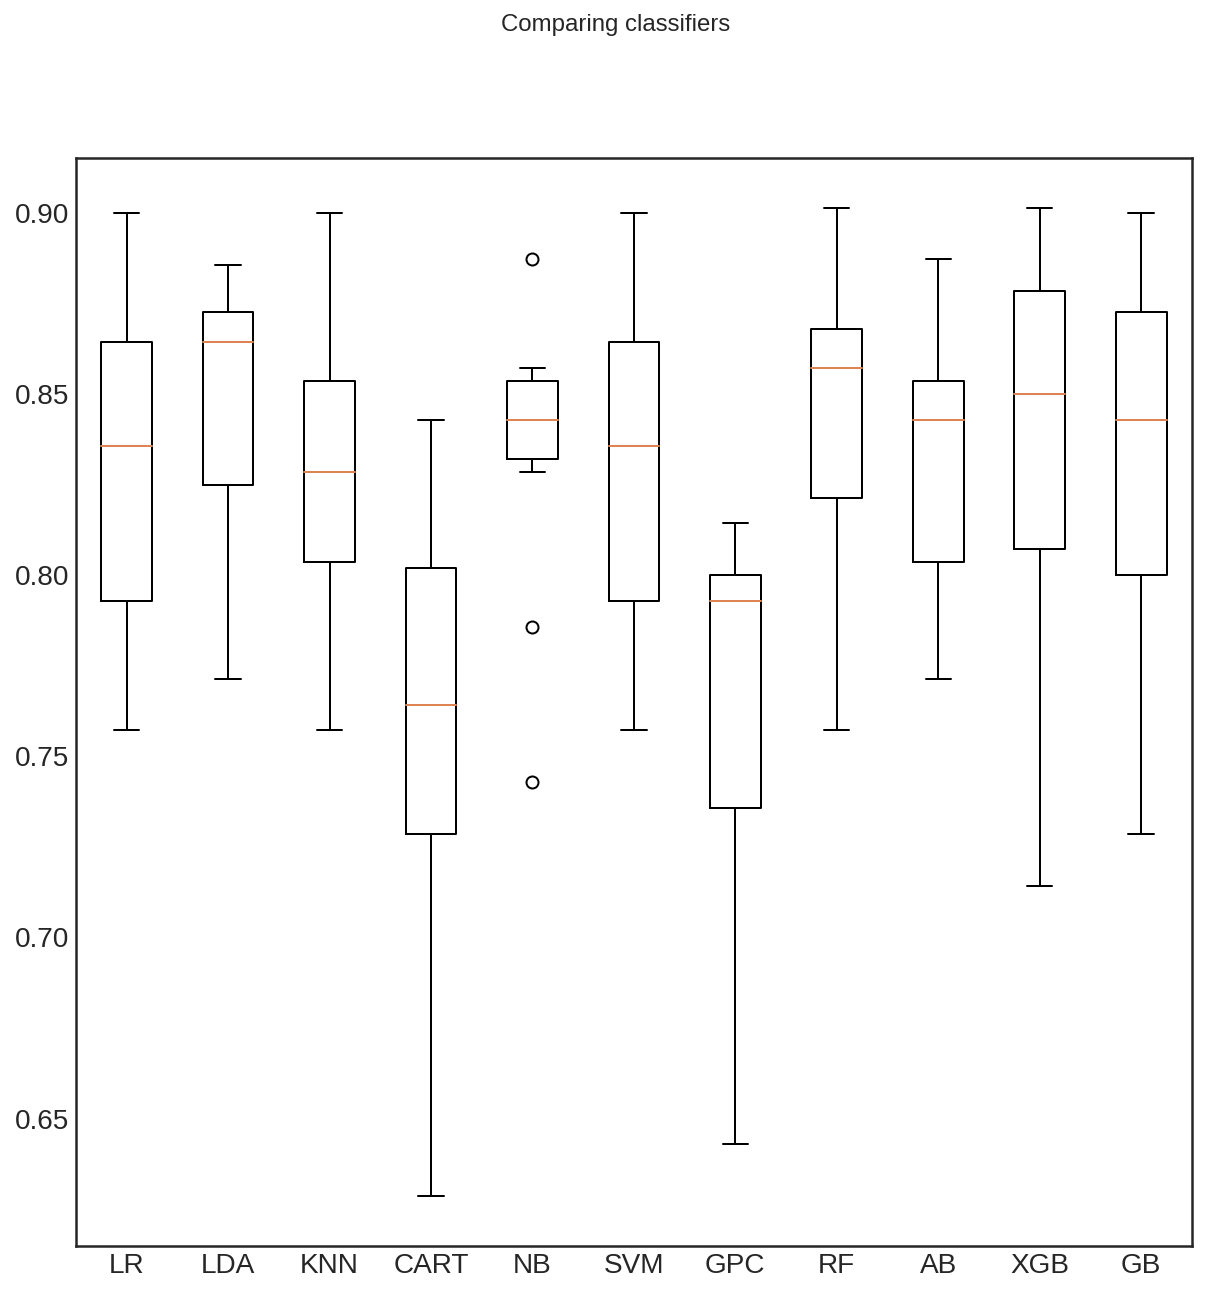

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparing classifiers')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
classifiers = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(probability=True),
    GaussianProcessClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier()]

In [ ]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

LogisticRegression
****Results****
Accuracy: 88.6364%
Log Loss: 0.3664185025774486
LinearDiscriminantAnalysis
****Results****
Accuracy: 86.3636%
Log Loss: 0.33095423515748973
KNeighborsClassifier
****Results****
Accuracy: 86.3636%
Log Loss: 1.2790953371110885
DecisionTreeClassifier
****Results****
Accuracy: 76.7045%
Log Loss: 8.045964955632602
GaussianNB
****Results****
Accuracy: 85.2273%
Log Loss: 0.37477791335841365
SVC
****Results****
Accuracy: 88.6364%
Log Loss: 0.3664318020825526
GaussianProcessClassifier
****Results****
Accuracy: 75.5682%
Log Loss: 0.6931471776412337
RandomForestClassifier
****Results****
Accuracy: 84.6591%
Log Loss: 0.33775553922992557
AdaBoostClassifier
****Results****
Accuracy: 86.3636%
Log Loss: 0.6349780002183291
XGBClassifier
****Results****
Accuracy: 87.5000%
Log Loss: 0.3198808551612522
GradientBoostingClassifier
****Results****
Accuracy: 85.7955%
Log Loss: 0.3488606042135855
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 58.5227%
Log Loss: 12.34

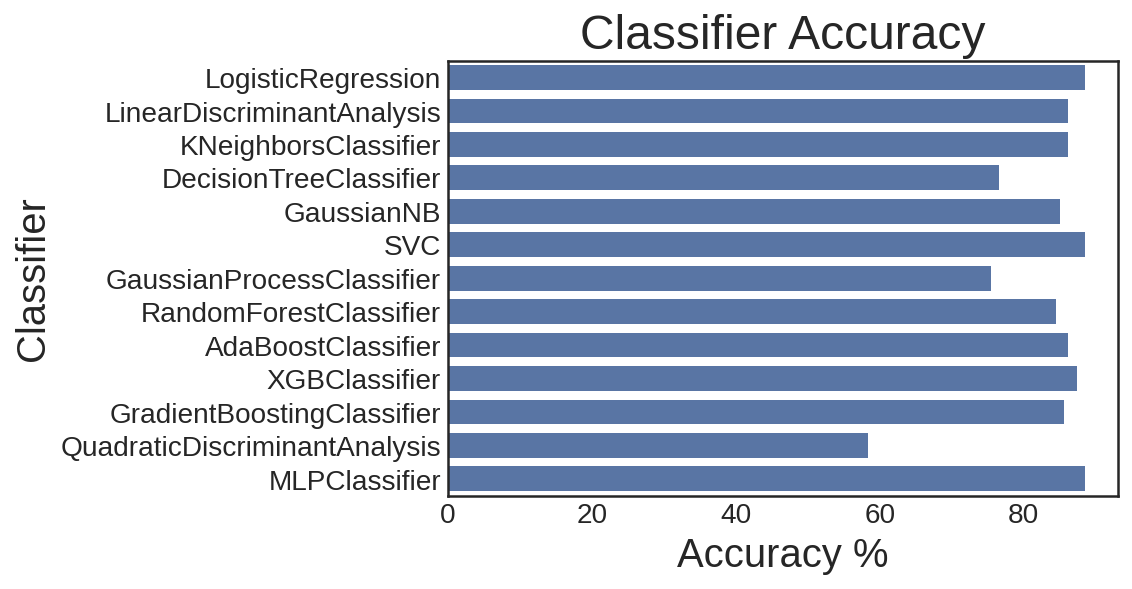

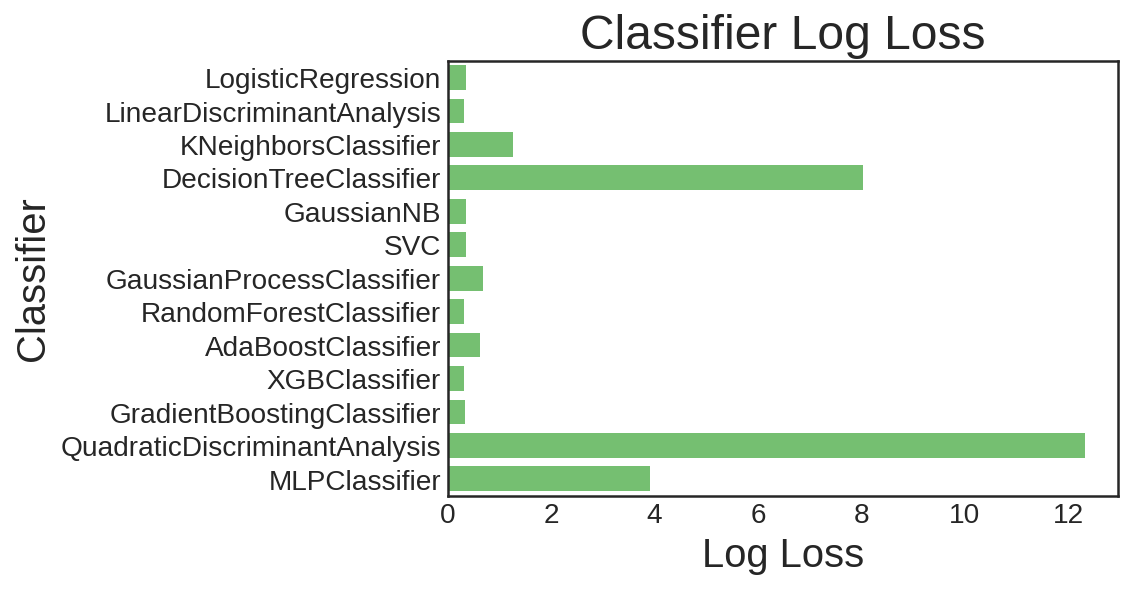

In [ ]:
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
clf = XGBClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


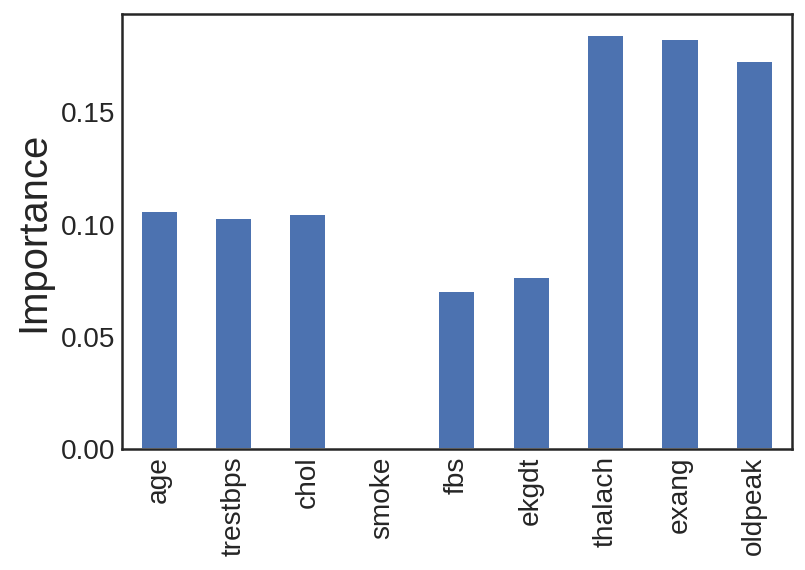

In [ ]:
importance = clf.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [ ]:
clf.score(X_train, y_train)

0.912981455064194

In [ ]:
clf.score(X_test, y_test)

0.875

In [ ]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [ ]:
classifier = XGBClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

XGBClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2,
              random_state=1234)

In [ ]:
model_.score(X_train, y_train)

0.8815977175463623

In [ ]:
model_.score(X_test, y_test)

0.8636363636363636